In [20]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# if you face any Error install these two packages:
# pip install tensorflow
# pip install pandas-datareader

In [21]:
# Inserting the data from Yahoo Finance:
# To forecast the price of a commodity, just add its symbole in the command bellow. 
# Here are some examples: Crude Oil(NG=F), Natural Gas Jul (NG=F)
df = web.DataReader('NG=F', data_source='yahoo', start='2012-01-01', end='2022-06-23')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,3.074,2.936,2.969,2.993,106186.0,2.993
2012-01-04,3.123,2.975,2.978,3.096,133510.0,3.096
2012-01-05,3.123,2.947,3.122,2.980,163137.0,2.980
2012-01-06,3.077,2.955,2.960,3.062,115519.0,3.062
2012-01-09,3.032,2.977,3.011,3.011,107254.0,3.011
...,...,...,...,...,...,...
2022-06-17,7.588,6.881,7.454,6.944,103759.0,6.944
2022-06-20,6.845,6.632,6.800,6.694,103759.0,6.694
2022-06-21,6.976,6.554,6.800,6.808,120010.0,6.808


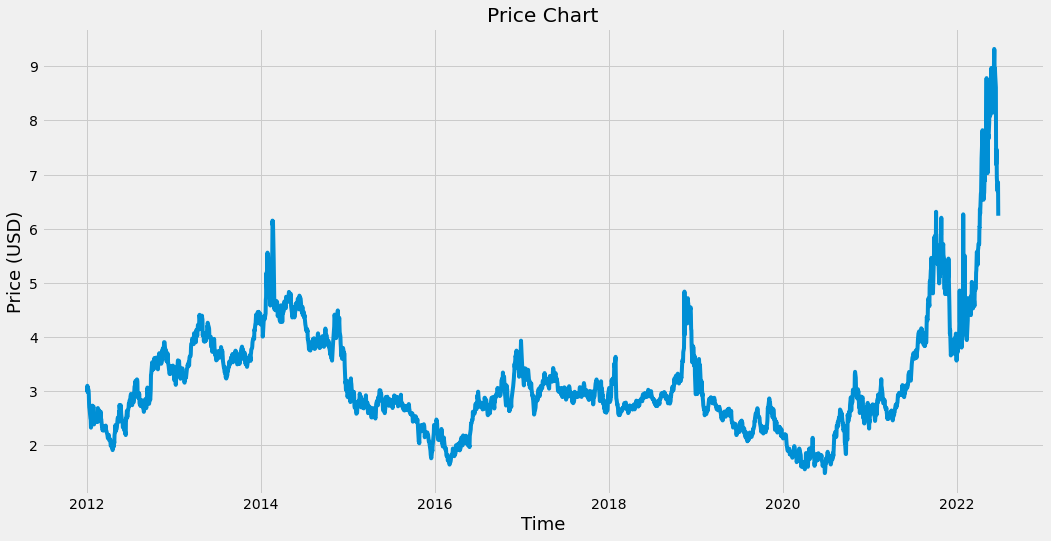

In [22]:
# plot close prices:
plt.figure(figsize=(16,8))
plt.title('Price Chart')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Price (USD)', fontsize=18)
plt.show()

In [23]:
# Create a new dataset with only the 'Close' column:
data=df.filter(['Close'])
# COnvert the dataset to a numpy array:
dataset= data.values
# The number of rows to train the LSTM model on:
training_data_len= math.ceil(len(dataset)*0.8) # 'math.ceil' is to round it up
training_data_len

2109

In [24]:
# Scale the data (normalization):
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data # All values will be between 0 and 1.

array([[0.19272961],
       [0.20586735],
       [0.19107144],
       ...,
       [0.67933679],
       [0.6857143 ],
       [0.60676022]])

In [25]:
# Create the training dataset:
train_data= scaled_data[0:training_data_len , :] # applied to all of the columns
# Split the data into x_train and y_train data set:
x_train= [] #Independent variable. The list is currently empty.
y_train= [] #Dependent variable
# The lists are currently empty. We use '.append' to add a number to a list:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #Adding the past 60 values to the x-list. we give 0 to column.
    y_train.append(train_data[i, 0]) # The 61th value goes to y-list.
    if i<=61: # To see what is going on. This part is not necessary.
        print(x_train)
        print(y_train)
        print() #i<=60 gives the first prediction. i<=61 gives the 2nd prediction, and so on.

[array([0.19272961, 0.20586735, 0.19107144, 0.20153063, 0.19502551,
       0.18609695, 0.16479592, 0.1549745 , 0.15153063, 0.12831632,
       0.1262755 , 0.10714287, 0.10982143, 0.13303573, 0.13673469,
       0.15905614, 0.14323981, 0.15255103, 0.15701532, 0.1302296 ,
       0.11479592, 0.13673469, 0.12971941, 0.13622449, 0.1262755 ,
       0.12321429, 0.12691327, 0.12691327, 0.12104593, 0.13392859,
       0.12028061, 0.13839285, 0.15331634, 0.14591837, 0.14808673,
       0.14528063, 0.13622449, 0.1229592 , 0.13227042, 0.14464286,
       0.12512757, 0.12780613, 0.11135205, 0.11147959, 0.10459185,
       0.10076532, 0.10739795, 0.10038267, 0.10420919, 0.10229591,
       0.10165818, 0.10765307, 0.11084185, 0.10880103, 0.11198979,
       0.10038267, 0.10114798, 0.09489797, 0.09260204, 0.09043368])]
[0.08507652727445597]

[array([0.19272961, 0.20586735, 0.19107144, 0.20153063, 0.19502551,
       0.18609695, 0.16479592, 0.1549745 , 0.15153063, 0.12831632,
       0.1262755 , 0.10714287, 0.10

In [26]:
# Convert the x_train and y_train to numpy arrays so we can use them in LSTM model.
x_train, y_train= np.array(x_train), np.array(y_train)

In [27]:
x_train= np. reshape(x_train, (x_train.shape[0], x_train.shape[1],1)) # (number of rows, columns, features:'Close')
x_train.shape

(2049, 60, 1)

In [28]:
# build the LSTM model:
model= Sequential()
# Add layers to LSTM model:
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
# compile the model. the model is optimized based on min MSE
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Train the model:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2049/2049 [==============================] - 115s 52ms/step - loss: 8.5821e-04


In [31]:
# Create the testing dataset
# create a new arrat containing scaled values from index 2050 to 2637
test_data= scaled_data[training_data_len-60: , :] #'training_data_len-60: ' means from a specific point till end
# Create the datasets x_test and y_test
x_test= [] # Currently an empty list
y_test=dataset[training_data_len:, :] # y_test contains all predicted values.
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) #The past 60 values from the position i-60 to i. Column: 0

In [32]:
# Convert the data to a numpy array to be used in LSTM model:
x_test= np.array(x_test)
# Reshape the data from 2D to 3D:
x_test= np. reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
 

In [33]:
# Get the predicted price values:
predictions= model.predict(x_test) # ideally, we want it to be equal to y_test values
predictions= scaler.inverse_transform(predictions)

17/17 [==============================] - 23s 31ms/step


In [34]:
# Elavuating the accuracy of our model by getting the RMSE:
rmse=np.sqrt(np.mean(predictions- y_test)**2)
rmse

0.03407317343427741

C:\Users\ams40\AppData\Local\Temp\ipykernel_1208\988512272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


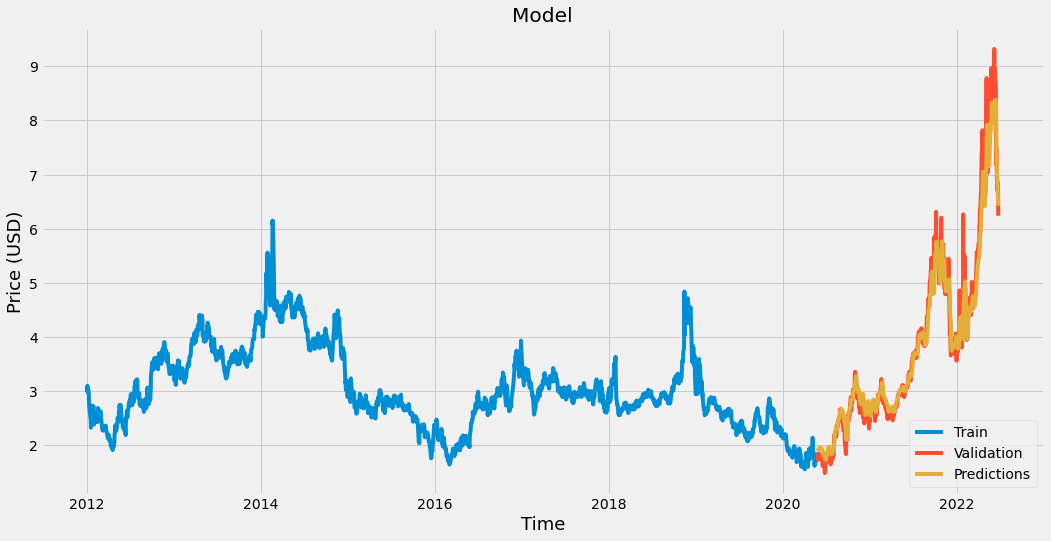

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()


In [36]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-05-26,1.793,1.892276
2020-05-27,1.722,1.903679
2020-05-28,1.827,1.903255
2020-05-29,1.849,1.917464
2020-06-01,1.774,1.939751
...,...,...
2022-06-17,6.944,7.123874
2022-06-20,6.694,6.854987
2022-06-21,6.808,6.605734


In [37]:
#Now, we want to use our model to predict the tomorrow’s stock price:
#Get the quote
apple_quote = web.DataReader('NG=F', data_source='yahoo', start='2012-01-01', end='2022-06-23')
# Create a new dataframe
new_df= apple_quote.filter(['Close'])
# Get the last 60 days closing price and cover the dataset to an array
last_60_days= new_df[-60:].values # .values is used to convert to array
# Scale the data to be values between 0 and 1 (normalization):
last_60_days_scaled= scaler.transform(last_60_days)
# Create an empty list
X_test=[]
# Append the past 60 days:
X_test.append(last_60_days_scaled)
# Convert the X_test to numpy array
X_test= np.array(X_test)
# Reshape the data:
X_test= np. reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get the predicted scaled price:
pred_price= model.predict(X_test)
#Undo the scaling:
pred_price= scaler.inverse_transform(pred_price)
print(pred_price) #Tomorrow's predicted price

1/1 [==============================] - 0s 35ms/step
[[6.287016]]


In [38]:
# What is the real price?
apple_quote2 = web.DataReader('NG=F', data_source='yahoo', start='2022-06-20', end='2022-06-24')
print(apple_quote2['Close'])

Date
2022-06-20    6.694
2022-06-21    6.808
2022-06-22    6.858
2022-06-23    6.239
2022-06-24    6.220
Name: Close, dtype: float64
